In [1]:
using LinearAlgebra
using CairoMakie
using DataFrames
using CSV
using DelimitedFiles

In [2]:
include("src/mc_structure.jl")
include("src/mc_neighbors.jl")
include("src/mc_vectors.jl")

get_DM_vectors (generic function with 1 method)

In [3]:
# Parámetros de red (Cr)
const a_len = 6.15409
const b_len = 6.15374
const gamma = deg2rad(120.0530)

# Configuración de supercelda extendida
const N = 12
v1 = [a_len, 0.0, 0.0]
v2 = [b_len * cos(gamma), b_len * sin(gamma), 0.0]
v3 = [0.0, 0.0, 0.0]
superlattice_matrix = hcat(N * v1, N * v2, N * v3)

3×3 Matrix{Float64}:
 73.8491  -36.9816  0.0
  0.0      63.9174  0.0
  0.0       0.0     0.0

In [4]:
basis_frac = [[0.99993, 0.00006,0.0],[0.66674, 0.33327,0.0]]

2-element Vector{Vector{Float64}}:
 [0.99993, 6.0e-5, 0.0]
 [0.66674, 0.33327, 0.0]

In [ ]:
# Generación de coordenadas fraccionarias en la supercelda N x N
frac_coords =get_frac_coords(basis_frac,N)
writedlm("data/frac_coords.txt", frac_coords)

288-element Vector{Vector{Float64}}:
 [0.0833275, 5.0e-6, 0.0]
 [0.05556166666666667, 0.027772500000000002, 0.0]
 [0.0833275, 0.08333833333333333, 0.0]
 [0.05556166666666667, 0.11110583333333333, 0.0]
 [0.0833275, 0.16667166666666666, 0.0]
 [0.05556166666666667, 0.1944391666666667, 0.0]
 [0.0833275, 0.250005, 0.0]
 [0.05556166666666667, 0.27777250000000003, 0.0]
 [0.0833275, 0.33333833333333335, 0.0]
 [0.05556166666666667, 0.3611058333333333, 0.0]
 ⋮
 [0.9722283333333334, 0.6111058333333333, 0.0]
 [0.9999941666666666, 0.6666716666666667, 0.0]
 [0.9722283333333334, 0.6944391666666667, 0.0]
 [0.9999941666666666, 0.7500049999999999, 0.0]
 [0.9722283333333334, 0.7777725000000001, 0.0]
 [0.9999941666666666, 0.8333383333333333, 0.0]
 [0.9722283333333334, 0.8611058333333333, 0.0]
 [0.9999941666666666, 0.9166716666666667, 0.0]
 [0.9722283333333334, 0.9444391666666667, 0.0]

In [11]:
writedlm("data/frac_coords.txt", frac_coords)

In [12]:
natoms = length(frac_coords)

288

In [13]:
coords = [superlattice_matrix * f for f in frac_coords]
writedlm("data/coords.txt", coords)

In [14]:
# Rangos de búsqueda (Å)
ranges = Dict(
    1 => (0.1, 4.0),
    2 => (4.0, 6.8),
    3 => (6.8, 7.5)
)

# Ejecución
neighbor_shells = analyze_neighbors_pbc(frac_coords, superlattice_matrix, ranges)
neighbor_shells

Dict{Int64, Vector{Vector{Int64}}} with 3 entries:
  2 => [[3, 23, 25, 27, 265, 287], [4, 24, 26, 28, 266, 288], [1, 5, 27, 29, 26…
  3 => [[28, 48, 288], [27, 267, 287], [26, 30, 266], [29, 265, 269], [28, 32, …
  1 => [[2, 24, 26], [1, 3, 265], [2, 4, 28], [3, 5, 267], [4, 6, 30], [5, 7, 2…

In [15]:
for level in keys(neighbor_shells)
    writedlm("data/neighbors$level.txt", neighbor_shells[level])
end

In [10]:
x = [c[1] for c in coords]
y = [c[2] for c in coords]

288-element Vector{Float64}:
  0.0003195868025091823
  1.775144894537253
  5.32676629528888
  7.101591603023624
 10.65321300377525
 12.428038311509995
 15.97965971226162
 17.754485019996366
 21.306106420747994
 23.08093172848273
  ⋮
 39.06027185394185
 42.61189325469348
 44.38671856242822
 47.93833996317984
 49.713165270914594
 53.264786671666215
 55.03961197940096
 58.59123338015259
 60.36605868788733

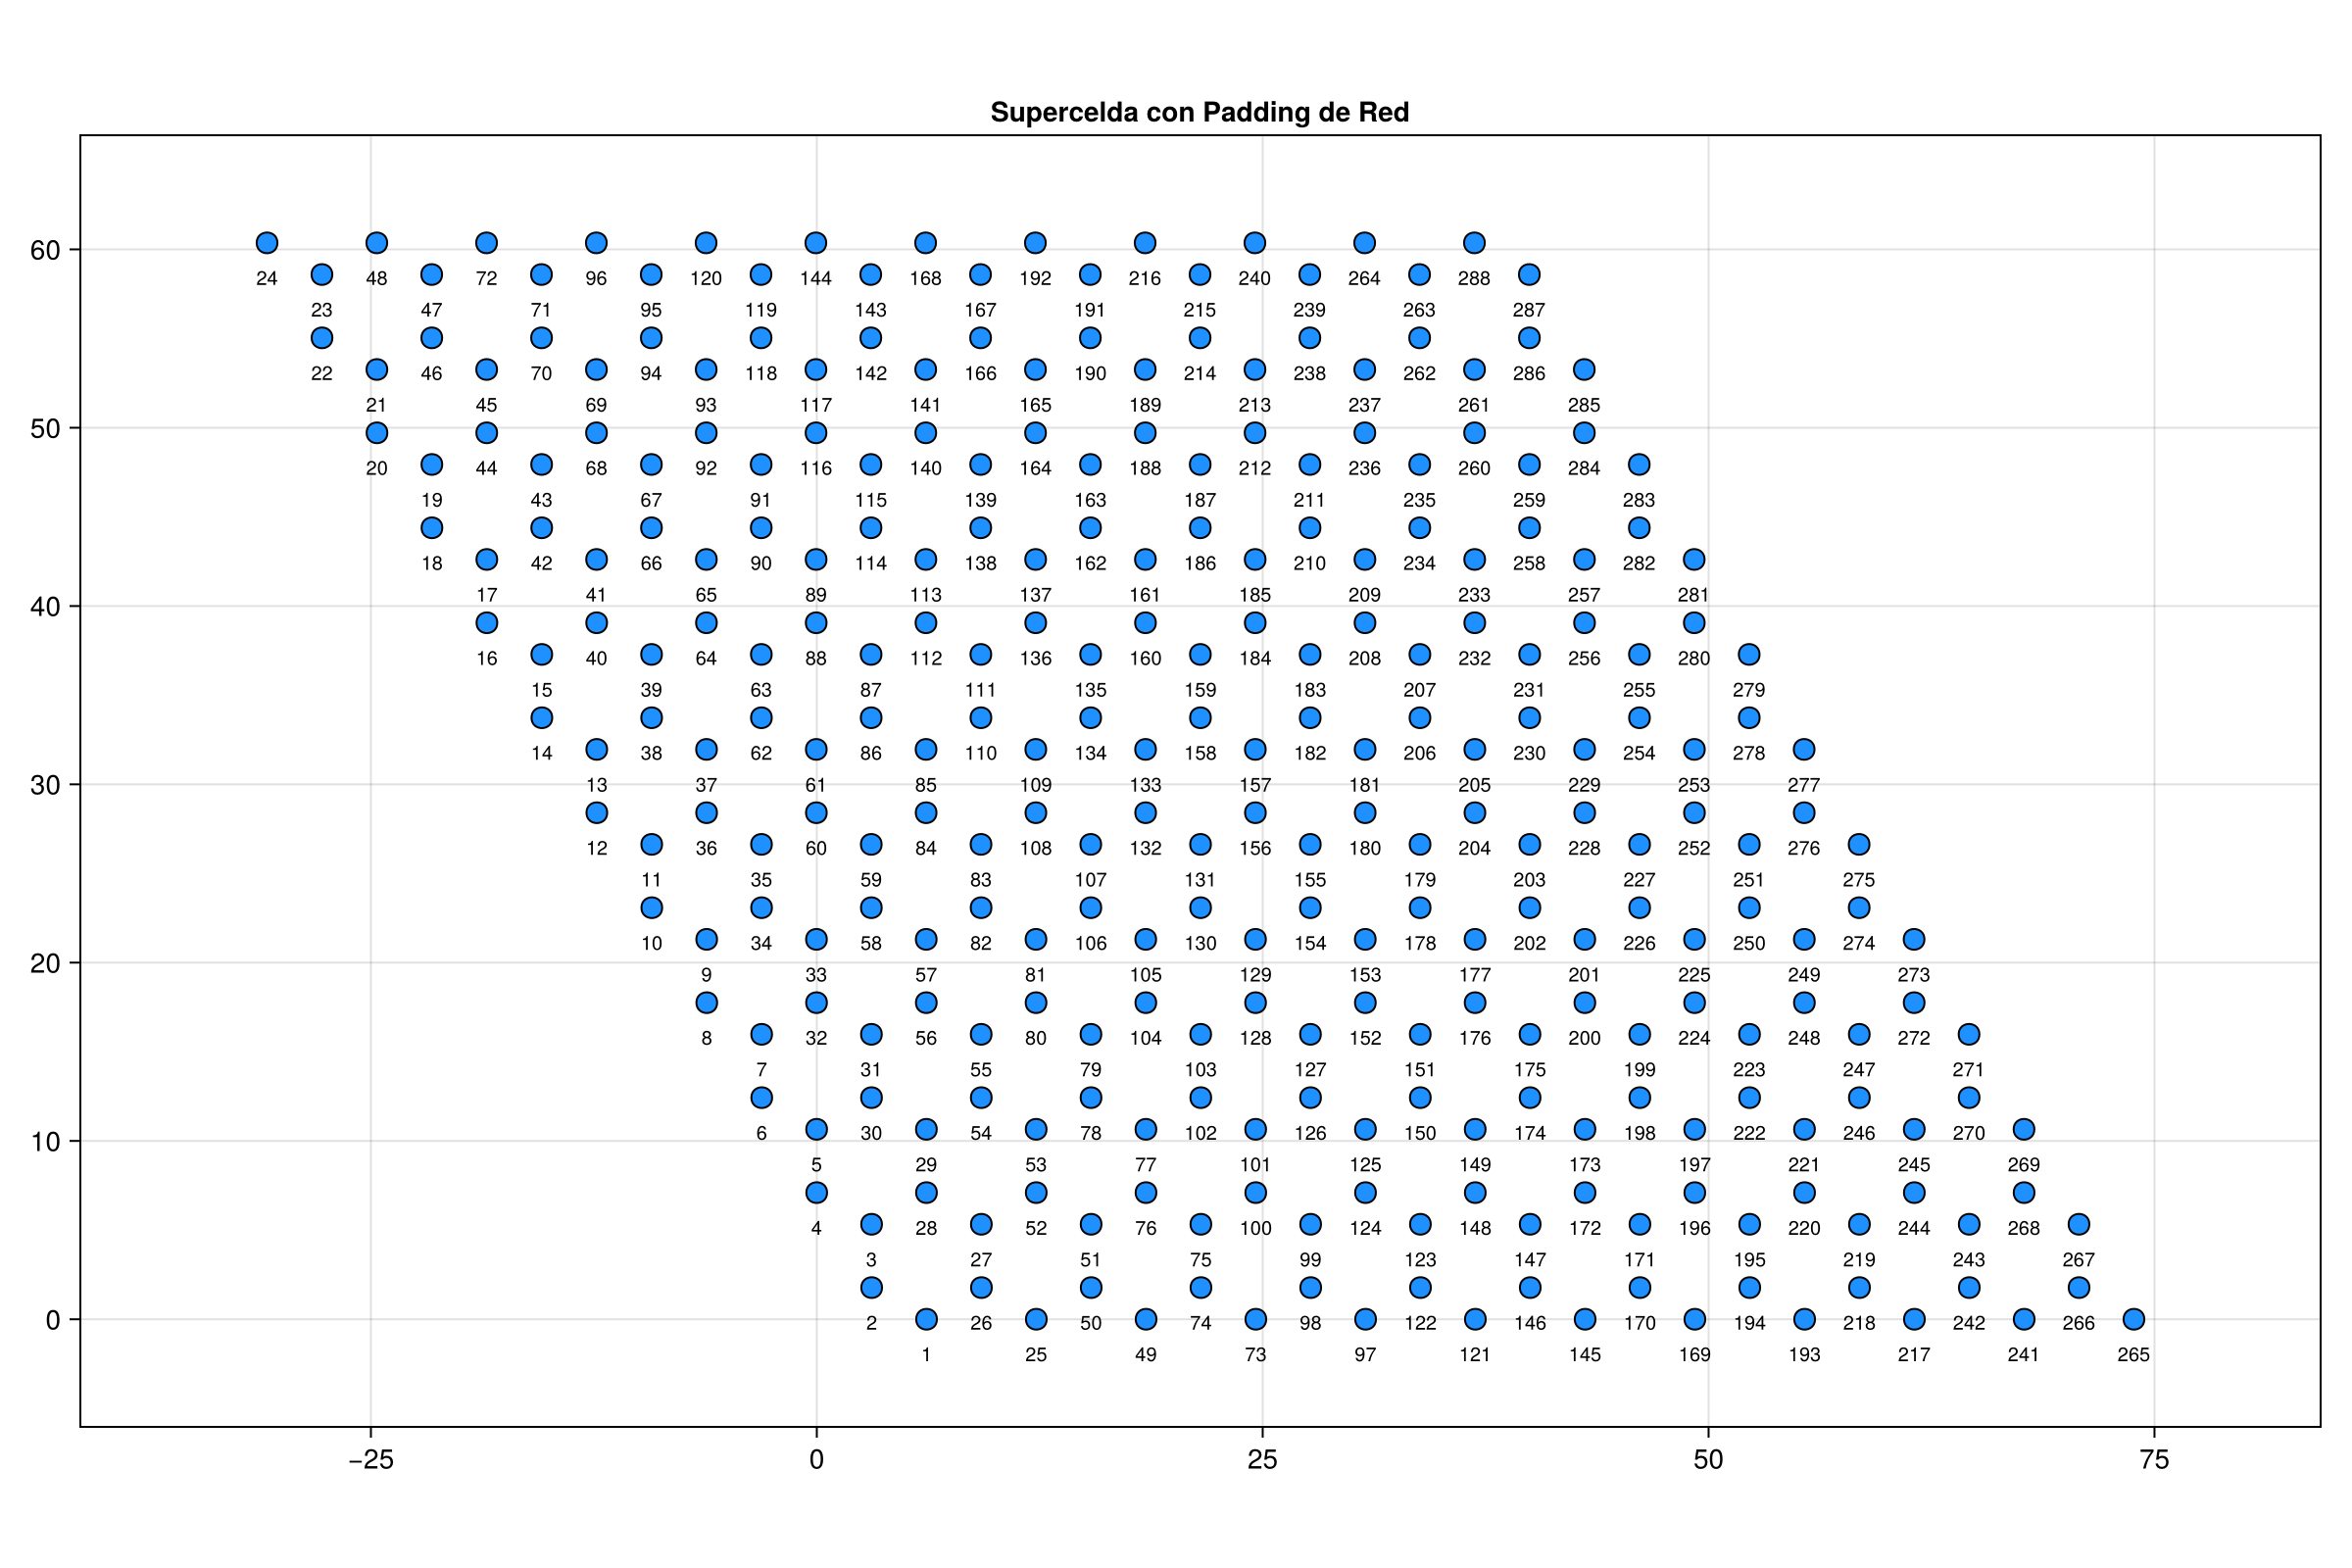

In [11]:
using CairoMakie

fig = Figure(size = (1200, 800), backgroundcolor = :white)

ax1 = Axis(
    fig[1, 1],
    aspect = DataAspect(),
    title = "Supercelda con Padding de Red",
    xgridvisible = true,
    ygridvisible = true,
    # Ajuste de márgenes automáticos (proporcional al rango)
    xautolimitmargin = (0.1, 0.1),
    yautolimitmargin = (0.1, 0.1)
)

# Visualización
scatter!(ax1, x, y, 
    color = :dodgerblue, 
    markersize = 15, 
    strokewidth = 1, 
    strokecolor = :black
)

labels = ["$i" for i in 1:length(x)]
text!(ax1, x, y; 
    text = labels, 
    align = (:center, :top), 
    offset = (0, -12),
    fontsize = 10
)

fig